# **Normalized Cross Correlation for mask detection**

**Use Normalized Cross Correlation for mask detection**

---



### **Start by mounting the drive**

**Mounting the Drive allows the notebook to access the dataset folder. You can see all the files in your Drive this way, but no one else can see them because a new VM is loaded each time. **

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **Load the required modules and data**





In [2]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from cv2 import cv2

from matplotlib import rcParams
rcParams['axes.grid'] = False

In [3]:
templatepath = 'gdrive/MyDrive/CV-FinalProject/step1_mask_dataset/MaskTheFace-master/masks/templates/'
imgpath = 'gdrive/MyDrive/CV-FinalProject/dataset/training/'
valpath = 'gdrive/MyDrive/CV-FinalProject/dataset/validation/'
testpath = 'gdrive/MyDrive/CV-FinalProject/dataset/test_real/'

masks = os.listdir(templatepath)
training = os.listdir(imgpath)
validation = os.listdir(valpath)
ftest = os.listdir(testpath)

## **Train the model**

**Non-masked images**

In [4]:
trialnum = 40
nmscores = np.zeros(trialnum)
nmcoords = []
max = 0
bestc = (0, 0)
for i in range(trialnum):
  max = 0
  img = cv2.imread(imgpath+training[i])
  print(training[i])
  for j in range(21):
    template = cv2.imread(templatepath+masks[j])
    res = cv2.matchTemplate(img,template,cv2.TM_CCORR_NORMED)
    min_val, score, min_loc, coord = cv2.minMaxLoc(res)
    if score > max:
      max = score
      bestc = coord
  nmscores[i] = max
  nmcoords.append(bestc)
print(nmscores)
print(nmcoords)

01474.png
01494.png
01483.png
01487.png
01476.png
01495.png
01492.png
01493.png
01479.png
01515.png
01509.png
01514.png
01497.png
01503.png
01519.png
01499.png
01533.png
01526.png
01532.png
01527.png
01520.png
01530.png
01545.png
01547.png
01541.png
01573.png
01571.png
01572.png
01575.png
01562.png
01567.png
01557.png
01564.png
01583.png
01584.png
01594.png
01592.png
01590.png
01585.png
01593.png
[0.83458585 0.82543647 0.85168868 0.84270656 0.82365882 0.80318195
 0.89512008 0.85423118 0.79984468 0.86729157 0.78623837 0.76791555
 0.85488838 0.80387574 0.80527258 0.831397   0.83278209 0.83856702
 0.85966593 0.84051043 0.83741313 0.83238006 0.84719616 0.81550676
 0.80915934 0.86080617 0.86530578 0.80605143 0.80733162 0.86123967
 0.79746199 0.82765585 0.81710327 0.84814531 0.84662092 0.82731229
 0.81954896 0.86636329 0.86014044 0.78390068]
[(154, 129), (454, 106), (91, 139), (337, 504), (218, 452), (329, 494), (173, 467), (220, 446), (0, 486), (139, 472), (430, 528), (0, 485), (20, 341), (

**Masked images**

In [5]:
mscores = np.zeros(trialnum)
mcoords = []
max = 0
bestc = (0, 0)
for i in range(trialnum):
  max = 0
  img = cv2.imread(imgpath+training[800+i])
  print(training[800+i])
  for j in range(21):
    template = cv2.imread(templatepath+masks[j])
    res = cv2.matchTemplate(img,template,cv2.TM_CCORR_NORMED)
    min_val, score, min_loc, coord = cv2.minMaxLoc(res)
    if score > max:
      max = score
      bestc = coord
  mscores[i] = max
  mcoords.append(bestc)
print(mscores)
print(mcoords)

00113_cloth.png
00675_surgical.png
01225_surgical_green.png
00891_N95.png
01392_surgical.png
01386_surgical_green.png
00715_N95.png
00729_KN95.png
01345_KN95.png
00271_cloth.png
01609_cloth.png
00517_cloth.png
01621_N95.png
01147_cloth.png
01620_cloth.png
01146_N95.png
00258_cloth.png
00264_N95.png
00502_KN95.png
01191_N95.png
01185_surgical.png
01344_surgical.png
01422_KN95.png
00066_surgical_green.png
01378_KN95.png
00714_surgical_green.png
00700_N95.png
00072_cloth.png
01387_KN95.png
01393_N95.png
01556_N95.png
01542_surgical.png
00674_KN95.png
01595_surgical_green.png
01581_surgical_green.png
00853_KN95.png
01754_KN95.png
00338_cloth.png
01026_N95.png
01740_surgical.png
[0.8317607  0.89400345 0.87666363 0.86492646 0.84587526 0.87991017
 0.88377327 0.87367249 0.87867904 0.84692013 0.85080945 0.81187475
 0.90172815 0.8246181  0.82948595 0.88691676 0.82974476 0.89489675
 0.87372404 0.89114946 0.87208617 0.90028965 0.91134864 0.88939953
 0.87543082 0.8302868  0.88903773 0.82568043 0.89

**Plot the NCC scores of both masked and non-masked images.**

(array([1., 6., 3., 3., 6., 7., 9., 3., 1., 1.]),
 array([0.81187475, 0.82369989, 0.83552504, 0.84735018, 0.85917532,
        0.87100047, 0.88282561, 0.89465076, 0.9064759 , 0.91830105,
        0.93012619]),
 <a list of 10 Patch objects>)

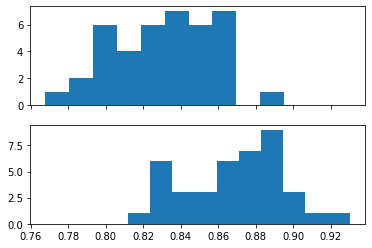

In [6]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].hist(nmscores, bins = 10)
ax[1].hist(mscores, bins = 10)

In [7]:
thresh = 0.87

## **Test the threshold**

**Non-masked images**

In [8]:
scores = []
val = []
max = 0
bestc = (0, 0)
for i in range(trialnum):
  max = 0
  img = cv2.imread(valpath+validation[i])
  print(validation[i])
  for j in range(21):
    template = cv2.imread(templatepath+masks[j])
    res = cv2.matchTemplate(img,template,cv2.TM_CCORR_NORMED)
    min_val, score, min_loc, coord = cv2.minMaxLoc(res)
    if score > max:
      max = score
      bestc = coord
  if max > thresh:
    scores.append(max)
    val.append(validation[i])
print(scores)
print(val)

01760_surgical_green.png
00318_KN95.png
00293_surgical.png
00244_KN95.png
00286_surgical.png
01832_cloth.png
01205_cloth.png
01563_N95.png
01775_KN95.png
01991_surgical_green.png
00327_surgical_green.png
01549_KN95.png
00086_cloth.png
00092_cloth.png
01164_N95.png
00246_N95.png
00118_surgical_green.png
01945_KN95.png
00134_cloth.png
01438_surgical_green.png
00928_KN95.png
00323_surgical_green.png
00490_surgical.png
00080_surgical_green.png
00269_cloth.png
01228_KN95.png
00693_N95.png
01071_cloth.png
00019_surgical.png
00555_KN95.png
01887_cloth.png
00030_surgical.png
01070_KN95.png
01338_cloth.png
00026_surgical.png
01661_surgical.png
00386_cloth.png
00143_surgical.png
00625_KN95.png
01856_cloth.png
[0.8807070851325989, 0.904054582118988, 0.9040006995201111, 0.8716961741447449, 0.8783316016197205, 0.8953288793563843, 0.8731603026390076, 0.8909862637519836, 0.8974279165267944, 0.8741543889045715, 0.891613781452179, 0.8885868191719055, 0.9027196764945984, 0.8918934464454651, 0.8713203072

**Masked images**

In [ ]:
scores = []
val = []
max = 0
bestc = (0, 0)
for i in range(trialnum):
  max = 0
  img = cv2.imread(valpath+validation[100+i])
  print(validation[100+i])
  for j in range(21):
    template = cv2.imread(templatepath+masks[j])
    res = cv2.matchTemplate(img,template,cv2.TM_CCORR_NORMED)
    min_val, score, min_loc, coord = cv2.minMaxLoc(res)
    if score > max:
      max = score
      bestc = coord
  if max > thresh:
    scores.append(max)
    val.append(validation[100+i])
print(scores)
print(val)

## **Final Test on real images**

In [ ]:
scores = []
fmasks = []
fnomasks = []
max = 0
bestc = (0, 0)
for i in range(trialnum):
  max = 0
  img = cv2.imread(testpath+ftest[i])
  print(ftest[i])
  for j in range(21):
    template = cv2.imread(templatepath+masks[j])
    try:
      res = cv2.matchTemplate(img,template,cv2.TM_CCORR_NORMED)
      min_val, score, min_loc, coord = cv2.minMaxLoc(res)
      if score > max:
        max = score
        bestc = coord
    except:
      print("Mask image is bigger than the image")
  if max > thresh:
    scores.append(max)
    fmasks.append(ftest[i])
  else:
    scores.append(max)
    fnomasks.append(ftest[i])
print(scores)
print(fmasks)

im_00.jpg
Mask image is bigger than the image
Mask image is bigger than the image
Mask image is bigger than the image
Mask image is bigger than the image
Mask image is bigger than the image
Mask image is bigger than the image
im_23.jpg
Mask image is bigger than the image
Mask image is bigger than the image
Mask image is bigger than the image
Mask image is bigger than the image
Mask image is bigger than the image
im_15.jpg
Mask image is bigger than the image
Mask image is bigger than the image
Mask image is bigger than the image
im_26 (1).jpg
Mask image is bigger than the image
Mask image is bigger than the image
Mask image is bigger than the image
im_26.jpg
Mask image is bigger than the image
Mask image is bigger than the image
im_28.jpg
Mask image is bigger than the image
Mask image is bigger than the image
Mask image is bigger than the image
Mask image is bigger than the image
im_03.jpg
Mask image is bigger than the image
im_11.jpg
Mask image is bigger than the image
Mask image is bi